In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages

1.14.0


C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_04\Anaconda3\envs\tf_t

In [2]:
# 데이터 타입
import tensorflow as tf
hello = tf.constant('hello .tensorFlow') # 텐서플로우 상수 생성
# 상수 (constant) , 변수 (Variable) , 심볼릭변수(placeholder)
sess = tf.Session()
# value 를 출력하려면 아래와 같이 세션 생성 후 run해야함 
print(sess.run(hello)) # numpy 데이터로 변경 
print(hello)# tensorflow 의 데이터는 직접 확인 불가 

b'hello .tensorFlow'
Tensor("Const:0", shape=(), dtype=string)


# 텐서플로우
- 자료구조 
 상수 , 변수 , 심볼릭변수 
 
- 변수
변수 초기화 : 변수는 초기화하지 않으면 사용할수 없다 반드시 .initialization\

- 심볼릭 변수\
실행시에 데이터를 제공하는 방법으로 실제 딥러닝 모델 구축시 많이 사용된다 
sess.run 에서 feed_dict에 dictionary 형식으로 값을 넣어주고 이를 feeding 이라고 한다 

In [4]:
# variable 
x = tf.constant(35, name = 'x') 
# 모델의 그래프 구조 확인
# 모델을 그대로 저장(가중치)할 때 메모리 위치를 확인하기 위해서
y = tf.Variable(x + 5 , name = 'y') # 변수가 있는 경우 - 반드시 초기화 해야함
print(y)

<tf.Variable 'y_1:0' shape=() dtype=int32_ref>


In [8]:
model = tf.global_variables_initializer() # 변수 초기화를 시켜줘야함 
with tf.Session() as session:
    session.run(model)
    print( session.run(y))

40


In [11]:
# 판다스 에서 데이터 초기화 (list , dict) # 요소끼리 계산 (배열 연산 )
a = tf.constant([1,2,3], name = 'a') # GPU 공간
b = tf.constant([4,5,6], name = 'b')
add_op = a + b

with tf.Session() as session:
    print(session.run(add_op))

[5 7 9]


In [13]:
# 자료구조 : graph로 구성 - 골격 (구조) 형성 
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)
add =tf.add(a,b)
mul = tf.multiply(a,b)
total = tf.multiply(add, mul)

In [18]:
with tf.Session() as session:
#    print("feed 변수 합: %i" % sess.run(add,
#                                    feed_dict={a:2,b:3}))
#    print("feed 변수곱: %i" % sess.run(mul,
#                                    feed_dict={a:2,b:3}))
    print("feed 변수곱 합: %i" % sess.run(total,
                                    feed_dict={a:2,b:3}))

feed 변수곱 합: 30


In [20]:
matrix1 = tf.constant([[3.,3.]]) # 1 x 2 
matrix2 = tf.constant([[2.],[2.]]) #  2 x 1 = > 1 x 1 
product = tf.matmul(matrix1, matrix2) # matric multiply
with tf.Session() as sess: # 실행부 
    result = sess.run(product) 
    print(result)

[[12.]]


In [24]:
zeros = tf.zeros([2,2]) # 0
ones =tf.ones([6]) # 1
# 균등분포
uniform = tf.random_uniform([3,3,3], minval=0.0, maxval = 10)
# 정규분포
normal = tf.random_normal([3,3,3], mean = 0.0 , stddev = 2.0)
# 표준편차 2배내의 것으로 초기화
trunc =tf.truncated_normal([2,2] , mean = 5.0 ,stddev = 1.0)
random_var = tf.Variable(tf.truncated_normal([2,2]))

In [35]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(trunc))
print("변수초기화", sess.run(random_var))

[[4.920932 3.510498]
 [5.028556 6.578892]]
변수초기화 [[ 0.01879157 -0.52334565]
 [-0.4839992   0.84911186]]


In [37]:
import tensorflow as tf
my_tensor = tf.constant(0, shape = [6,2]) # 6 x 2  => 상수화 
my_static_shape = my_tensor.get_shape()
print(type(my_static_shape)) # class
print(my_static_shape) # 내용은 run 으로  차수는 get_shape 함수

<class 'tensorflow.python.framework.tensor_shape.TensorShape'>
(6, 2)


In [63]:
import tensorflow as tf
tf.InteractiveSession()
tf.zeros(2)
a = tf.zeros(2)
print(a.eval())

[0. 0.]


In [68]:
def showvalue(t):
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    print(t.eval())
    sess.close()

In [69]:
c2 ,c3 = tf.constant([1.2,5.6]), tf.constant([-4,-1,7])
v2 ,v3 = tf.Variable([2.3, 4.5]), tf.Variable([-2,3,5])
showvalue(tf.add_n([c2,v2]))
showvalue(tf.add_n([c3,v3,v3]))

[ 3.5 10.1]
[-8  5 17]


In [ ]:
# 2x + y + z = 1
# 4x + 3y + 4z =2
# -4x + 2y + 2z = -6

In [66]:
sess =tf.Session()
x= tf.constant([2.0,1.0,1.0 ,4,3,4, -4,2,2], shape = [3,3])
print(sess.run(x))
y =tf.constant([1.0,2,-6],shape=[3,1])
print(sess.run(y))

[[ 2.  1.  1.]
 [ 4.  3.  4.]
 [-4.  2.  2.]]
[[ 1.]
 [ 2.]
 [-6.]]


In [70]:
z = tf.matrix_solve(x,y)
result = sess.run(z)
print("계수" , result)
print(sess.run(z))

계수 [[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]
[[ 1.0000001]
 [-2.0000002]
 [ 1.0000001]]


In [74]:
print(2.0 * result[0] + 1.0 * result[1] + 1.0 * result[2])
######################### x * z 
print(sess.run(tf.matmul(x,z)))

[1.0000001]
[[ 1.0000001]
 [ 2.       ]
 [-6.000001 ]]


In [78]:
# z = tf.matrix_solver(x,y) == 
x_1 = tf.matrix_inverse(x)
z = tf.matmul(x_1,y)
sess.run(z)

array([[ 1.0000002],
       [-2.0000005],
       [ 1.0000002]], dtype=float32)

In [84]:
# 특이행렬분해 (singular value decomposition) # 행, 열 에 값이 다를때 (2 x 3)
# pca 할 때 - 고유값 분해 eigenvalue , eigenvector : 정방행렬
a = tf.constant([1,2,3,4,5,6], shape= [2,3])
a = tf.to_float(a)
# 행과 열의 특징을 별도로 뽑는다
# 정방행렬
# truncate : 
s ,u ,v = tf.svd(a) # singula value , u(2x2),s(1X2),v(3X2)
print("2",sess.run(s))
print("3",sess.run(u))
print("4",sess.run(v))

2 [9.508034   0.77286935]
3 [[-0.38631773 -0.92236584]
 [-0.92236584  0.38631773]]
4 [[-0.42866713  0.8059641 ]
 [-0.56630695  0.1123824 ]
 [-0.70394677 -0.58119917]]


In [85]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬 - one - hot - encoding 
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [87]:
print(sess.run(tf.diag_part(dia)))
print(sess.run(tf.trace(dia)))

[1 2 3 4]
10


In [89]:
import numpy as np
a = tf.constant([1,2,3,4,5,6] , shape = [2,3])
b = tf.constant([7,8,9,10,11,12], shape = [3,2])
c = tf.matmul(a,b)
sess.run(c)

array([[ 58,  64],
       [139, 154]])

In [95]:
# 행열 : 행과 열을 확인하고 앞의 것은 개수 어떻게 층을 이루고 있는지 
a = tf.constant(np.arange(1,13,dtype=np.int32),
               shape = [2,2,3]) # 행열을 중심하고 데이터 표현 
print("1",sess.run(a))
b = tf.constant(np.arange(13,25, dtype =np.int32),
shape = [2,3,2])
print("2",sess.run(b))
c= tf.matmul(a,b)
sess.run(c)

1 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
2 [[[13 14]
  [15 16]
  [17 18]]

 [[19 20]
  [21 22]
  [23 24]]]


array([[[ 94, 100],
        [229, 244]],

       [[508, 532],
        [697, 730]]])

In [97]:
a = tf.constant(np.arange(1,25,dtype=np.int32),
               shape = [2,2,2,3]) # 행열을 중심하고 데이터 표현 
print(sess.run(a))
b = tf.constant(np.arange(25,49, dtype =np.int32),
shape = [2,2,3,2])
print(sess.run(b))
c= tf.matmul(a,b)
sess.run(c)

[[[[ 1  2  3]
   [ 4  5  6]]

  [[ 7  8  9]
   [10 11 12]]]


 [[[13 14 15]
   [16 17 18]]

  [[19 20 21]
   [22 23 24]]]]
[[[[25 26]
   [27 28]
   [29 30]]

  [[31 32]
   [33 34]
   [35 36]]]


 [[[37 38]
   [39 40]
   [41 42]]

  [[43 44]
   [45 46]
   [47 48]]]]


array([[[[ 166,  172],
         [ 409,  424]],

        [[ 796,  820],
         [1093, 1126]]],


       [[[1642, 1684],
         [1993, 2044]],

        [[2704, 2764],
         [3109, 3178]]]])

In [107]:
# a 를 제곱한다면 : 자기자신을 제곱하려면 전치 
d = tf.matmul(a,tf.transpose(a, perm=[0,1,3,2]))
print(sess.run(d))
tf.matmul(a,a,transpose_b = True) # 전치해서 자기제곱 

[[[[  14   32]
   [  32   77]]

  [[ 194  266]
   [ 266  365]]]


 [[[ 590  716]
   [ 716  869]]

  [[1202 1382]
   [1382 1589]]]]


<tf.Tensor 'MatMul_29:0' shape=(2, 2, 2, 2) dtype=int32>

In [113]:
x = tf.constant([[[1,2,3], 
                 [4,5,6]], #  0 1 2
                [[7,8,9],   # 2x2x3 = > 제곱  2 x 3 x 2 (0 ,2 ,1 )
                [10,11,12]]])
print(sess.run(tf.shape(x)))
sess.run(tf.transpose(x)) # 3 x 2 x 2  : 디폴트 2 1 0 

[2 2 3]


array([[[ 1,  7],
        [ 4, 10]],

       [[ 2,  8],
        [ 5, 11]],

       [[ 3,  9],
        [ 6, 12]]])

In [116]:
y = tf.transpose(x, perm=[0,2,1])
sess.run(tf.transpose(y))

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [118]:
sess.run(tf.matmul(x, tf.transpose(x, perm=[0,2,1])))

array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]])

In [121]:
t = [1,2,3,4,5,6]
t = tf.reshape(t,[1,2,1,3,1,1])
sess.run(t)

array([[[[[[1]],

          [[2]],

          [[3]]]],



        [[[[4]],

          [[5]],

          [[6]]]]]])

In [123]:
print("t의 차원은", sess.run(tf.shape(t)))

t의 차원은 [1 2 1 3 1 1]


In [125]:
print("차원의 수를 축소할 때 ", sess.run(tf.shape(tf.squeeze(t))))

차원의 수를 축소할 때  [2 3]


In [131]:
tensor = [1,2,3,4,5,6,7,8,9,10,11,12]
print("1",sess.run(tf.reshape(tensor,[2,-1]))) # 계산으로 채워라
tf.reshape(tensor , [-1,6])
print("2",sess.run(tf.reshape(tensor, [2,-1,3])))

1 [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
2 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [133]:
# t = 1,1,2,1,3,1,1
print(tf.expand_dims(t,0)) # 차원확대

Tensor("ExpandDims_1:0", shape=(1, 1, 2, 1, 3, 1, 1), dtype=int32)


In [135]:

t = [[1,2,3], [4,5,6]] # 2 x 3 = > 4 x 7 
paddings = [[1,1],[2,2]] # 위아래 왼쪽 오른쪽 
print(sess.run(tf.pad(t, paddings, "CONSTANT")))

[[0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 0 0 0 0 0]]


In [138]:
# 수를 채우는 방법 
paddings = [[1,1,],[1,1]] # 4 x 5
print(sess.run(tf.pad(t,paddings, "REFLECT")))

[[5 4 5 6 5]
 [2 1 2 3 2]
 [5 4 5 6 5]
 [2 1 2 3 2]]


In [140]:
# 확장 = symmetric 
print(sess.run(tf.pad(t,paddings, "SYMMETRIC")))

[[1 1 2 3 3]
 [1 1 2 3 3]
 [4 4 5 6 6]
 [4 4 5 6 6]]


# 다차방정식의 해
- 무작위 대입법 
- 역행렬을 구함
- 입출력 데이터만 : 계수결정 ( 가중치 학습을 통해서 학습 ) 

In [190]:
# 데이터로 부터 규칙을 발견 = > 분류와 예측을 하기 위해서 
import numpy as np 
import tensorflow as tf
# 데이터 생성  - > minimize  = > padding 
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * .01 + 0.3  # 선형방정식 
len(y_data)


100

In [188]:
# 가중치 편향
# 설명력
# bias 는 activation 활성화 계수 
# 가중치에는 꼭 bias 가 붙는다
W = tf.Variable(tf.random_uniform([1],-1.0,1.0)) # 균등분포 사용 
b = tf.Variable(tf.zeros([1])) # bias 

sess = tf.Session()
y = W * x_data + b

In [189]:
# loss function : mse  2차원인 경우 포물선을 이루고 최적점은 한개 
loss = tf.reduce_mean(tf.square(y - y_data)) # 예측치 - 실제값 
# reduce = 합쳐라 
# 경사하강법 
# 기울기 : 미분을 이용해서 - 면 가중치에 차를 더해주고 
#                     기울기 + 면 가중치에 감하는 연산 
optimizer = tf.train.GradientDescentOptimizer(0.5) # 0.5 학습율 
train = optimizer.minimize(loss)

In [160]:
init = tf.global_variables_initializer() # sess 을 실행하기 전 
sess.run(init)

In [162]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step , sess.run(W),sess.run(b))

0 [0.01000009] [0.29999995]
20 [0.01000009] [0.29999995]
40 [0.01000009] [0.29999995]
60 [0.01000009] [0.29999995]
80 [0.01000009] [0.29999995]
100 [0.01000009] [0.29999995]
120 [0.01000009] [0.29999995]
140 [0.01000009] [0.29999995]
160 [0.01000009] [0.29999995]
180 [0.01000009] [0.29999995]
200 [0.01000009] [0.29999995]


In [168]:
# placeholder 를 이용해서 값을 주입 
x = tf.placeholder(tf.float32 , name= 'x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1],-1.0,1.0)) # 균등분포 사용 
b = tf.Variable(tf.zeros([1])) # bias 

sess = tf.Session()
y_model = W * x  + b

In [170]:
loss = tf.reduce_mean(tf.square(y_model - y)) # 예측치 - 실제값 
optimizer = tf.train.GradientDescentOptimizer(0.5) # 0.5 학습율 
train = optimizer.minimize(loss)

In [172]:
init = tf.global_variables_initializer() # sess 을 실행하기 전 
sess.run(init)

In [176]:
for step in range(201):
    sess.run(train,{x:x_data, y:y_data})
    if step % 20 == 0:
        print(step , sess.run(W),sess.run(b))

0 [0.00999991] [0.30000007]
20 [0.00999991] [0.30000007]
40 [0.00999991] [0.30000007]
60 [0.00999991] [0.30000007]
80 [0.00999991] [0.30000007]
100 [0.00999991] [0.30000007]
120 [0.00999991] [0.30000007]
140 [0.00999991] [0.30000007]
160 [0.00999991] [0.30000007]
180 [0.00999991] [0.30000007]
200 [0.00999991] [0.30000007]


In [191]:
# 예측 
x = tf.placeholder(tf.float32 , name= 'x')
y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1],-1.0,1.0)) # 균등분포 사용 
b = tf.Variable(tf.zeros([1])) # bias 

sess = tf.Session()
y_model = W * x  + b

init = tf.global_variables_initializer() # sess 을 실행하기 전 
sess.run(init)

predicted = sess.run(y_model , {x:[i for i in range(100)]})

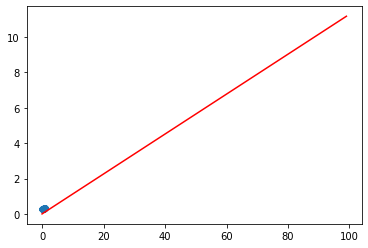

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o', markersize=5)
plt.plot(predicted, 'r')
plt.show()

In [207]:
from tensorflow.python.framework import ops 
import os 
ops.reset_default_graph()

In [206]:
sess = tf.Session()
x_vals = np.array([1.,3.,5.,7.,9.])
y_vals = np.array([1.,3.,5.,7.,9.])
x_data = tf.placeholder(tf.float32)
y_data = tf.placeholder(tf.float32)
m = tf.constant(3.)
prod = tf.multiply(x_data,y_data)
for x_val in x_vals:
    print(sess.run(prod,feed_dict={x_data : x_val,
                                  y_data : y_vals}))


[1. 3. 5. 7. 9.]
[ 3.  9. 15. 21. 27.]
[ 5. 15. 25. 35. 45.]
[ 7. 21. 35. 49. 63.]
[ 9. 27. 45. 63. 81.]


In [208]:
merged = tf.summary.merge_all()
if not os.path.exists('c://tmp/tensorboard_logs/'):
    os.makedirs('c://tmp/tensorboard_logs/')
my_writer = tf.summary.FileWriter('c://tmp/tensorboard_logs/',
                                 sess.graph)


In [226]:
import numpy
rng = numpy.random
# 상수화 할때 좋은점 :  
learning_rate = 0.01
training_epochs = 4000
display_step = 50
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]) 

In [237]:
# data point : 관측치
n_samples = train_X.shape[0] # 차수 : 행(인덱스)   / 열 : 변수개수
X = tf.placeholder('float')
Y = tf.placeholder('float')
W = tf.Variable(rng.randn(), name = 'weight') # 설명
b = tf.Variable(rng.randn(), name = 'bias')   # activation 활성화   /(노드)
activation = tf.add(tf.multiply(X, W), b)     # y = ax+b , 예측치
# 미니배치 사이즈 고려 
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) # pow(,2) 제곱
# 역전파 : optimizer도 하이퍼파라미터
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # 하이퍼파라미터, momentum : 가는 방향을 고려
init = tf.initialize_all_variables() 

Epoch :  0001 cost =  25.028123856 W= 1.2960196 b= 0.9207898
Epoch :  0051 cost =  0.077031918 W= 0.25341654 b= 0.7739647
Epoch :  0101 cost =  0.077026851 W= 0.2531889 b= 0.77560186
Epoch :  0151 cost =  0.077022374 W= 0.252975 b= 0.7771418
Epoch :  0201 cost =  0.077018440 W= 0.2527736 b= 0.7785905
Epoch :  0251 cost =  0.077014990 W= 0.25258425 b= 0.7799518
Epoch :  0301 cost =  0.077011943 W= 0.25240633 b= 0.78123164
Epoch :  0351 cost =  0.077009246 W= 0.2522389 b= 0.78243667
Epoch :  0401 cost =  0.077006899 W= 0.25208127 b= 0.78357005
Epoch :  0451 cost =  0.077004820 W= 0.251933 b= 0.7846369
Epoch :  0501 cost =  0.077003002 W= 0.25179365 b= 0.7856396
Epoch :  0551 cost =  0.077001408 W= 0.25166303 b= 0.7865788
Epoch :  0601 cost =  0.077000022 W= 0.2515403 b= 0.78746194
Epoch :  0651 cost =  0.076998785 W= 0.2514246 b= 0.7882942
Epoch :  0701 cost =  0.076997705 W= 0.25131595 b= 0.7890753
Epoch :  0751 cost =  0.076996759 W= 0.25121355 b= 0.7898124
Epoch :  0801 cost =  0.0769

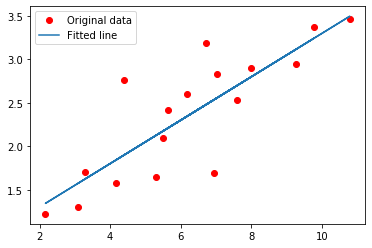

In [240]:
# 세션 연결 전까지 그래프 정의 : node(연산) + edge(데이터 전달 : tensor(배열+행렬))
# 전제조건 : GPU가 존재 => 네트워크로 연결(CPU-GPU)
with tf.Session() as sess :
    sess.run(init)
    for epoch in range(training_epochs) :  # 세대
        for(x, y) in zip(train_X, train_Y) : # 미니배치  데이터를 1개씩 feeding 
            sess.run(optimizer, feed_dict={X:x, Y:y}) 
        if epoch %display_step == 0: # 비용함수 : 감소 : 우하향 
            print('Epoch : ', '%04d' %(epoch+1), "cost = ", "{:.9f}".format(sess.run(cost, feed_dict={X:train_X, Y:train_Y})),
                 "W=", sess.run(W), "b=", sess.run(b))
    print("최적화 종료")
    print("cost=", sess.run(cost, feed_dict={X:train_X, Y: train_Y}),"W=", sess.run(W), "b=", sess.run(b) )
    plt.plot(train_X, train_Y, 'ro', label = 'Original data')
# predict 한 결과값 출력 n  
    plt.plot(train_X, sess.run(W)*train_X +sess.run(b), label = 'Fitted line')
    plt.legend()
    plt.show()

In [245]:
# tensor => 직접 시각화하는 것이 불가능 =? numpy 포멧으로 변경
import tensorflow as tf

def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)

In [249]:
my_distribution = tf.random_uniform((600,4), seed=42) # 24
uniform = run_variable(my_distribution)

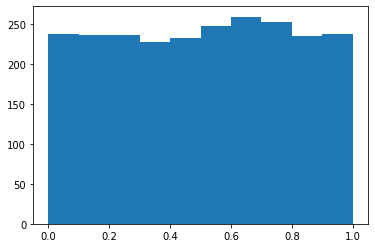

In [251]:
from matplotlib import pyplot as plt 
plt.hist(uniform.flatten()) # 데이터 메모리 저장 : 1 차원  
plt.show() # flatten 1차원으로 데이터를 만듬


In [252]:
# activation 함수 : 회귀나 분류나를 결정하는 함수 
# 비선형 매핑 ( 선형대수 ) -> 비선형문제로 변경 
# 가중치를 깊게하고 활성화함수 매핑으로 XOR 문제를 해결 

In [256]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

x_vals = np.linspace(start = -10. , stop =10., num=100)
print(x_vals)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

[ 0.  3. 10.]
[0.26894143 0.5        0.7310586 ]
[-0.7615942  0.         0.7615942]
[-0.63212055  0.          1.        ]
[-0.9999546  -0.99994444 -0.999932   -0.99991677 -0.99989814 -0.99987534
 -0.99984743 -0.99981327 -0.99977147 -0.99972031 -0.99965769 -0.99958106
 -0.99948727 -0.99937248 -0.999232   -0.99906006 -0.99884964 -0.9985921
 -0.99827691 -0.99789116 -0.99741905 -0.99684124 -0.99613408 -0.99526861
 -0.99420938 -0.99291301 -0.99132643 -0.98938465 -0.98700817 -0.98409965
 -0.98053999 -0.97618343 -0.97085155 -0.96432601 -0.95633957 -0.94656519
 -0.9346026  -0.9199619  -0.90204355 -0.88011378 -0.85327452 -0.82042669
 -0.78022512 -0.73102351 -0.67080701 -0.59710968 -0.50691352 -0.3965249
 -0.26142329 -0.0960761   0.1010101   0.3030303   0.50505051  0.70707071
  0.90909091  1.11111111  1.31313131  1.51515152  1.71717172  1.91919192
  2.12121212  2.32323232  2.52525253  2.72727273  2.92929293  3.13131313
  3.33333333  3.53535354  3.73737374  3.93939394  4.14141414  4.34343434
  4.

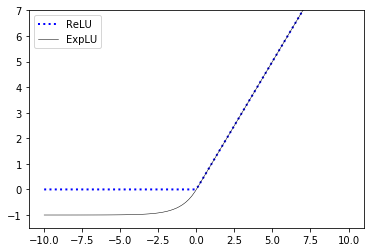

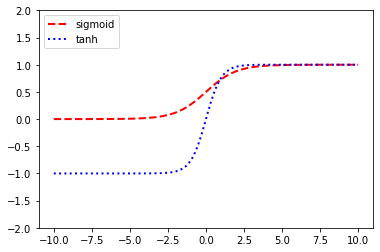

In [266]:
print(sess.run(tf.nn.relu([-3.,3.,10.])))
y_relu = sess.run(tf.nn.relu(x_vals))
print(sess.run(tf.nn.sigmoid([-1.,0.,1.])))
y_sigmoid = sess.run(tf.nn.sigmoid(x_vals))
print(sess.run(tf.nn.tanh([-1.,0.,1.]))) # -1 ~ 0 
y_tanh = sess.run(tf.nn.tanh(x_vals))
print(sess.run(tf.nn.elu([-1.,0.,1.]))) # 각진 단점 보완
y_elu = sess.run(tf.nn.elu(x_vals))
print(y_elu)
plt.plot(x_vals, y_relu, 'b:', label="ReLU", linewidth =2 )
plt.plot(x_vals, y_elu , 'k-', label = "ExpLU", linewidth= 0.5)
plt.ylim([-1.5,7])
plt.legend(loc="upper left")
plt.show()
plt.plot(x_vals, y_sigmoid, 'r--', label="sigmoid", linewidth =2 )
plt.plot(x_vals, y_tanh , 'b:', label = "tanh", linewidth= 2)
plt.ylim([-2,2])
plt.legend(loc ="upper left")
plt.show()

In [270]:
ops.reset_default_graph() # 그래프 초기화
sess = tf.Session()
tf.set_random_seed(5) #seed 값의 초기값
np.random.seed(42)
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1])) # weight 
b1 = tf.Variable(tf.random_uniform(shape=[1,1])) # bias 
a2 = tf.Variable(tf.random_normal(shape= [1,1])) # weight 
b2 = tf.Variable(tf.random_uniform(shape =[1,1]))
x = np.random.normal(2,0.1,500)
# 사이즈를 픽스 하지 않고 입력 데이터로 부터 계산 
# 행데이터로 생성 
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [279]:
# y = ax + b (0 ~ 1) 값으로 매핑 
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
# 0 ~ 무한대 
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))
# 0.75로 수렴하는 과정 `
# mse 
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)
print('\n Sigmoid AND Relu 함수의 최적화 0.75')


 Sigmoid AND Relu 함수의 최적화 0.75


In [275]:
loss_vec_sigmoid = [] # 로스값을 저장 
loss_vec_relu = [] 


In [280]:
for i in range(500) :
    # 500 -> 50  
    rand_indices = np.random.choice(len(x), size = batch_size)
    x_vals = np.transpose([x[rand_indices]]) # 모양을 맞추기 위해  
    sess.run(train_step_sigmoid, feed_dict = {x_data:x_vals})
    sess.run(train_step_relu, feed_dict = {x_data:x_vals})
    loss_vec_sigmoid.append(sess.run(loss1,feed_dict = {x_data:x_vals} ))
    loss_vec_relu.append(sess.run(loss2,feed_dict = {x_data:x_vals} ))
    sigmoid_output = np.mean(sess.run(sigmoid_activation, feed_dict={x_data:x_vals}))
    relu_output = np.mean(sess.run(relu_activation, feed_dict={x_data:x_vals}))
    if i%50 == 0 :
        print('sigmoid =' + str(np.mean(sigmoid_output)) + '\trelu = ' + str(np.mean(relu_output)))
# 0.75 수렴하는 과정 

sigmoid =0.12655206	relu = 2.0227606
sigmoid =0.17863758	relu = 0.7530296
sigmoid =0.24769813	relu = 0.7492897
sigmoid =0.3446748	relu = 0.7499546
sigmoid =0.4400661	relu = 0.7539999
sigmoid =0.5236898	relu = 0.754772
sigmoid =0.58373857	relu = 0.7508698
sigmoid =0.62733483	relu = 0.7470234
sigmoid =0.6549499	relu = 0.75180537
sigmoid =0.67452586	relu = 0.75470716


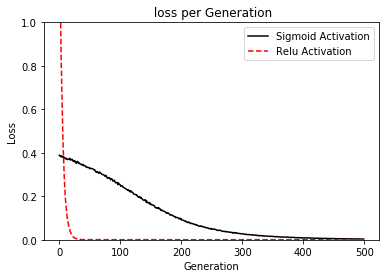

In [281]:
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(loss_vec_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title(' loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show() 